# LHD Retrieve Package - Usage Examples

This notebook demonstrates the basic usage of the `lhd-retrieve` package for retrieving LHD measurement data.

## Key Features

- **Automatic tool detection** - Finds Retrieve.exe automatically
- **Clean operation** - All temporary files automatically deleted  
- **Voltage conversion** - Convert raw data to voltage using `get_val()` or `.val` property
- **Export capabilities** - CSV, pandas, plotting support

## Basic Setup

In [1]:
# Import the package
from lhd_retrieve import LHDRetriever
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize retriever
retriever = LHDRetriever()
print("✅ LHDRetriever initialized successfully")

✅ LHDRetriever initialized successfully


## Basic Data Retrieval

In [4]:
# Retrieve data
data = retriever.retrieve_data(
    diag_name="mwscat",
    shot=183646,
    subshot=1,
    channel=1,
    time_axis=True
)

print(f"Data points: {len(data.data):,}")
print(f"Time range: {data.time[0]:.3f} - {data.time[-1]:.3f} seconds")
print(f"Raw data range: {data.data.min()} - {data.data.max()}")

Data points: 10,000,000
Time range: 0.000 - 10.000 seconds
Raw data range: -1916 - 10296


## Voltage Conversion

In [5]:
# Convert to voltage using metadata (VResolution and VOffset)
try:
    voltage_data = data.get_val()  # or data.val property
    print(f"Voltage range: {voltage_data.min():.6f} - {voltage_data.max():.6f} V")
    
    # Show metadata used for conversion
    vres = data.metadata.get('VResolution', data.metadata.get('VCoefficient1'))
    voff = data.metadata.get('VOffset', data.metadata.get('VCoefficient0', 0))
    print(f"VResolution: {vres}")
    print(f"VOffset: {voff}")
    
except ValueError as e:
    print(f"Voltage conversion failed: {e}")
    voltage_data = None

Voltage range: -0.584717 - 3.142090 V
VResolution: 0.00030517578125
VOffset: 0


## Data Visualization

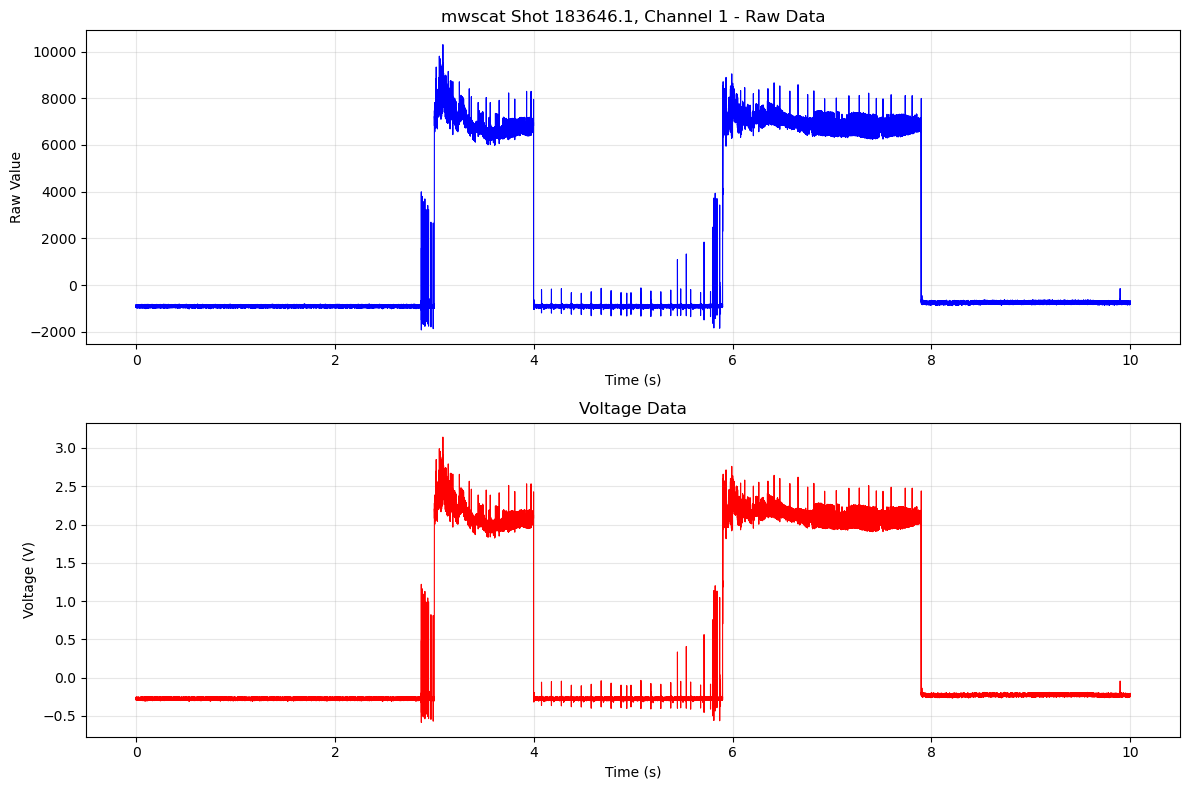

In [6]:
# Plot raw data and voltage data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Raw data
ax1.plot(data.time, data.data, 'b-', linewidth=0.8)
ax1.set_title(f'{data.description} - Raw Data')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Raw Value')
ax1.grid(True, alpha=0.3)

# Voltage data (if available)
if voltage_data is not None:
    ax2.plot(data.time, voltage_data, 'r-', linewidth=0.8)
    ax2.set_title('Voltage Data')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Voltage (V)')
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'Voltage conversion not available', 
             ha='center', va='center', transform=ax2.transAxes)

plt.tight_layout()
plt.show()

## Export Data

In [7]:
# Export to CSV
data.save_csv("example_data.csv")
print("✅ Data exported to example_data.csv")

# Convert to pandas DataFrame
df = data.to_pandas()
print(f"DataFrame shape: {df.shape}")
print(df.head())

✅ Data exported to example_data.csv
DataFrame shape: (10000000, 2)
       time  data
0  0.000001  -880
1  0.000002  -880
2  0.000003  -888
3  0.000004  -924
4  0.000005  -920


## Multiple Channels

In [8]:
# Retrieve multiple channels
channels = [1, 2, 3]
multi_data = retriever.retrieve_multiple_channels(
    diag_name="mwscat",
    shot=183646,
    subshot=1,
    channels=channels,
    time_axis=True
)

print(f"Retrieved {len(multi_data)} channels")
for ch, ch_data in multi_data.items():
    print(f"Channel {ch}: {len(ch_data.data)} points")

Retrieved 3 channels
Channel 1: 10000000 points
Channel 2: 10000000 points
Channel 3: 10000000 points


## Key Points

- Use `data.get_val()` or `data.val` to convert raw data to voltage
- VResolution and VOffset are automatically extracted from metadata  
- All temporary files are automatically cleaned up
- The package works on Windows and WSL environments